# Constructing a Multivariate sensitivity analysis

# Preliminaries
## Importing packages

In [1]:
import numpy as np
import pandas as pd
from itertools import product

import seaborn as sns
#sns.set()
#sns.set_style('whitegrid')
#sns.set_context('notebook')
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

from thesis_EAfunc import *
from thesis_visfunc import *

In [2]:
import datetime
time_a = datetime.datetime.now()
print(time_a)

2019-05-03 08:59:17.853911


# Define Landscape

In [3]:
#Problem domain
x_min = -15
x_max = 15
y_min = -15
y_max = 15

#Known minimum
x_point = -1
y_point = -1

domain = (x_min, x_max, y_min, y_max)
point = (x_point, y_point)
img_size = (8.5, 4.25)

#Problem definition
def f(x, y):
    D = 2
    alpha = 1/8
    
    x=(x-5)/6
    y=(y-5)/6
    
    a = np.abs(x ** 2 + y ** 2 - D) ** (alpha * D)
    b = ( 0.5 * (x ** 2 + y ** 2) + (x + y) ) / D
        
    return (a + b + 0.5)

#Testing the minimum
f(-1,-1)

0.0

# Running the Evolutionary Algorithm
Experiments -> Each trial with a different mutation probability and mutation size -> Each trial with 50 runs
## Setting the EA's parameters

In [4]:
#starting seed
np.random.seed(654321)

## Setting data storage

In [5]:
mult_fit_cols = ['exp'] + ['mut_s'] + ['mut_p'] + ['run', 'generation', 'fitness_min', 'fitness_max', 'fitness_mean', 'fitness_std']
multi_fit = pd.DataFrame(columns=mult_fit_cols)
multi_fit = multi_fit.infer_objects()

multi_gen_cols = ['exp'] + ['mut_s'] + ['mut_p'] + ['run', 'birthdate', 'generation', 'function', 'fitness', 'gen_x', 'gen_y']
multi_gen = pd.DataFrame(columns=multi_gen_cols)
multi_gen = multi_gen.infer_objects()

## Parameters common to all experiments

In [6]:
#Algorithm parameters
## Number of experiments, and generations per experiment
run_n = 50
gen_f = 40

## Population size
pop_s = 20

## Parent subpopulation's selection method and size
par_selection = 'Ranking'
par_s = 10

## Progeny subpopulation's and size
prog_s = par_s
### Crossover Method
crossover = 'Simple'
### Mutation method, probability and size
mutation = 'random_co_dis'
mut_p = [0.1, 0.25, 0.5, 0.75, 0.9]
mut_s = [1, 2.5, 5, 7.5, 10]

## New population selection method
population_new='Ranking'

## Iterative experiment

In [7]:
mut_p = [0.1, 0.25, 0.5, 0.75, 0.9]
mut_s = [1, 2.5, 5, 7.5, 10]
exp_par = list(product(mut_p,mut_s))
print(exp_par)

[(0.1, 1), (0.1, 2.5), (0.1, 5), (0.1, 7.5), (0.1, 10), (0.25, 1), (0.25, 2.5), (0.25, 5), (0.25, 7.5), (0.25, 10), (0.5, 1), (0.5, 2.5), (0.5, 5), (0.5, 7.5), (0.5, 10), (0.75, 1), (0.75, 2.5), (0.75, 5), (0.75, 7.5), (0.75, 10), (0.9, 1), (0.9, 2.5), (0.9, 5), (0.9, 7.5), (0.9, 10)]


In [8]:
exp_n = 1
for (xx,yy) in exp_par:
    genera_res, fitness_res = EA_exp(run_n, gen_f, f, domain, pop_s, par_s, prog_s, xx, yy, par_selection, crossover, mutation, population_new)
    
    fitness_res.insert(0,'mut_p',xx)
    fitness_res.insert(0,'mut_s',yy)
    fitness_res.insert(0,'exp',exp_n)
    multi_fit = multi_fit.append(fitness_res, ignore_index=True)
    multi_fit = multi_fit.infer_objects()
    
    genera_res.insert(0,'mut_p',xx)
    genera_res.insert(0,'mut_s',yy)
    genera_res.insert(0,'exp',exp_n)
    multi_gen = multi_gen.append(genera_res, ignore_index=True)
    multi_gen = multi_gen.infer_objects()
        
    exp_n += 1

In [13]:
multi_fit.to_pickle('./EA_A_04_fit.gz', compression='gzip')
multi_gen.to_pickle('./EA_A_04_gen.gz', compression='gzip')

In [8]:
multi_fit = pd.read_pickle('./EA_A_04_fit.gz', compression='gzip')
multi_gen = pd.read_pickle('./EA_A_04_gen.gz', compression='gzip')

In [9]:
time_b = datetime.datetime.now()
print(time_b)
print(time_b-time_a)

2019-05-03 08:59:40.761007
0:00:22.907096


# Data analysis

In [10]:
query = (multi_fit['generation']==gen_f)
multi_final_fitness_res = multi_fit[query].apply(pd.to_numeric)

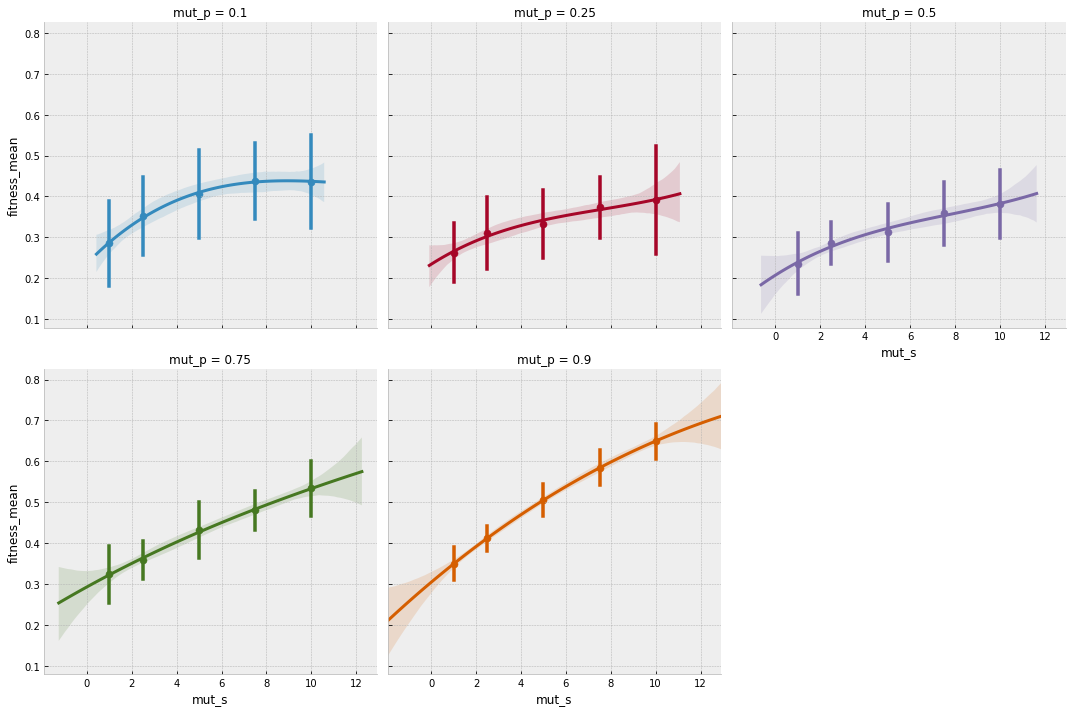

In [11]:
sns.lmplot(x='mut_s', y='fitness_mean', order=3, data=multi_final_fitness_res,hue='mut_p', col='mut_p', x_bins=5, col_wrap=3, x_ci='sd')

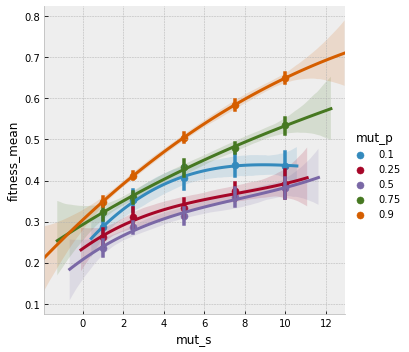

In [12]:
sns.lmplot(x='mut_s', y='fitness_mean', order=3, data=multi_final_fitness_res,hue='mut_p', x_bins=5)

In [13]:
time_c = datetime.datetime.now()
print(time_c)
print(time_c-time_a)

2019-05-03 09:00:40.705787
0:01:22.851876


In [16]:
multi_fit.info()
print()
multi_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51250 entries, 0 to 51249
Data columns (total 9 columns):
exp             51250 non-null int64
mut_s           51250 non-null float64
mut_p           51250 non-null float64
run             51250 non-null int64
generation      51250 non-null float64
fitness_min     51250 non-null float64
fitness_max     51250 non-null float64
fitness_mean    51250 non-null float64
fitness_std     51250 non-null float64
dtypes: float64(7), int64(2)
memory usage: 3.5 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525000 entries, 0 to 1524999
Data columns (total 10 columns):
birthdate     1525000 non-null float64
exp           1525000 non-null int64
fitness       1525000 non-null float64
function      1525000 non-null object
gen_x         1525000 non-null float64
gen_y         1525000 non-null float64
generation    1525000 non-null float64
mut_p         1525000 non-null float64
mut_s         1525000 non-null float64
run           1525000 non-null in

In [18]:
multi_final_fitness_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 40 to 51249
Data columns (total 9 columns):
exp             1250 non-null int64
mut_s           1250 non-null float64
mut_p           1250 non-null float64
run             1250 non-null int64
generation      1250 non-null float64
fitness_min     1250 non-null float64
fitness_max     1250 non-null float64
fitness_mean    1250 non-null float64
fitness_std     1250 non-null float64
dtypes: float64(7), int64(2)
memory usage: 137.7 KB
